In [1]:
#Importing required packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/arnab/Documents/Lead Scoring Assignment/Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Cleaning of data:**

In [7]:
# Checking the number of missing values in each column:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
df= df.replace('Select',np.nan)

In [9]:
null_percentage = df.isnull().sum()/len(df)*100
null_percentage.sort_values(ascending = False).head(15)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
dtype: float64

In [10]:
columns_to_remove = null_percentage[null_percentage > 40].index.tolist()

df.drop(columns_to_remove, axis = 1, inplace = True)

In [11]:
df.shape

(9240, 30)

In [12]:
# Checking value counts of "City" column:
df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

*Mumbai has highest leads but here Select value does not indicate any value.we can drop this column as it does not give any meaningful insights.*

In [13]:
df.drop('City', axis = 1, inplace = True)

In [14]:
df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [15]:
df.isnull().sum().sort_values(ascending=False)

Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [17]:
moderate_missing = ['Tags', 'What matters most to you in choosing a course',
                    'What is your current occupation', 'Country','Specialization']

for col in moderate_missing:
    if df[col].dtype == 'object':
        # Replace missing values in categorical columns with 'Unknown':
        df[col].fillna('Unknown', inplace=True)
    else:
        # Replace missing values in numerical columns with the median:
        df[col].fillna(df[col].median(), inplace=True)

In [18]:
null_percentage = df.isnull().sum()/len(df)*100
null_percentage.sort_values(ascending = False).head(15)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
dtype: float64

In [19]:
low_missing = ['Page Views Per Visit', 'TotalVisits', 'Last Activity']

for col in low_missing:
    if df[col].dtype == 'object':
        # Replace missing values in categorical columns with the mode:
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # Replace missing values in numerical columns with the mean:
        df[col].fillna(df[col].mean(), inplace=True)

In [20]:
df['Specialization'].value_counts(dropna=False)

Specialization
Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [21]:
df['Country'].value_counts(dropna=False)

Country
India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

*Maximum leads are from India.*

In [22]:
null_percentage = df.isnull().sum()/len(df)*100
null_percentage.sort_values(ascending = False).head(15)

Lead Source                                 0.38961
Prospect ID                                 0.00000
Search                                      0.00000
A free copy of Mastering The Interview      0.00000
I agree to pay the amount through cheque    0.00000
Get updates on DM Content                   0.00000
Update me on Supply Chain Content           0.00000
Tags                                        0.00000
Receive More Updates About Our Courses      0.00000
Through Recommendations                     0.00000
Digital Advertisement                       0.00000
Newspaper                                   0.00000
X Education Forums                          0.00000
Newspaper Article                           0.00000
Magazine                                    0.00000
dtype: float64

In [23]:
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [24]:
df['Lead Source'] = df['Lead Source'].fillna('not provided') 

In [25]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        22
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        42
Total Time Spent on Website                      1731
Page Views Per Visit                              115
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [26]:
df['Magazine'].value_counts(dropna=False)

Magazine
No    9240
Name: count, dtype: int64

In [27]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [28]:
df['Search'].value_counts(dropna=False)

Search
No     9226
Yes      14
Name: count, dtype: int64

In [29]:
df['Magazine'].value_counts(dropna=False)

Magazine
No    9240
Name: count, dtype: int64

In [30]:
# Removing columns with a single value as it will not contribute for analysis:
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [31]:
df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        22
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        42
Total Time Spent on Website                      1731
Page Views Per Visit                              115
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [32]:
df1.shape

(9240, 24)

In [33]:
# Rechecking the percentage of missing values:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [34]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [35]:
df1["Country"].value_counts(dropna=False)

Country
India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [36]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Unknown":
        category = "Unknown"
    else:
        category = "Outside India"
    return category

df1['Country'] = df1.apply(lambda x:slots(x['Country']), axis = 1)
df1['Country'].value_counts()

Country
India            6492
Unknown          2461
Outside India     287
Name: count, dtype: int64

In [37]:
# Removing id columns as they are unique throughout:
df2= df1.drop(['Prospect ID','Lead Number'],axis=1)
df2.shape

(9240, 22)

In [38]:
df2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [40]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [41]:
df2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

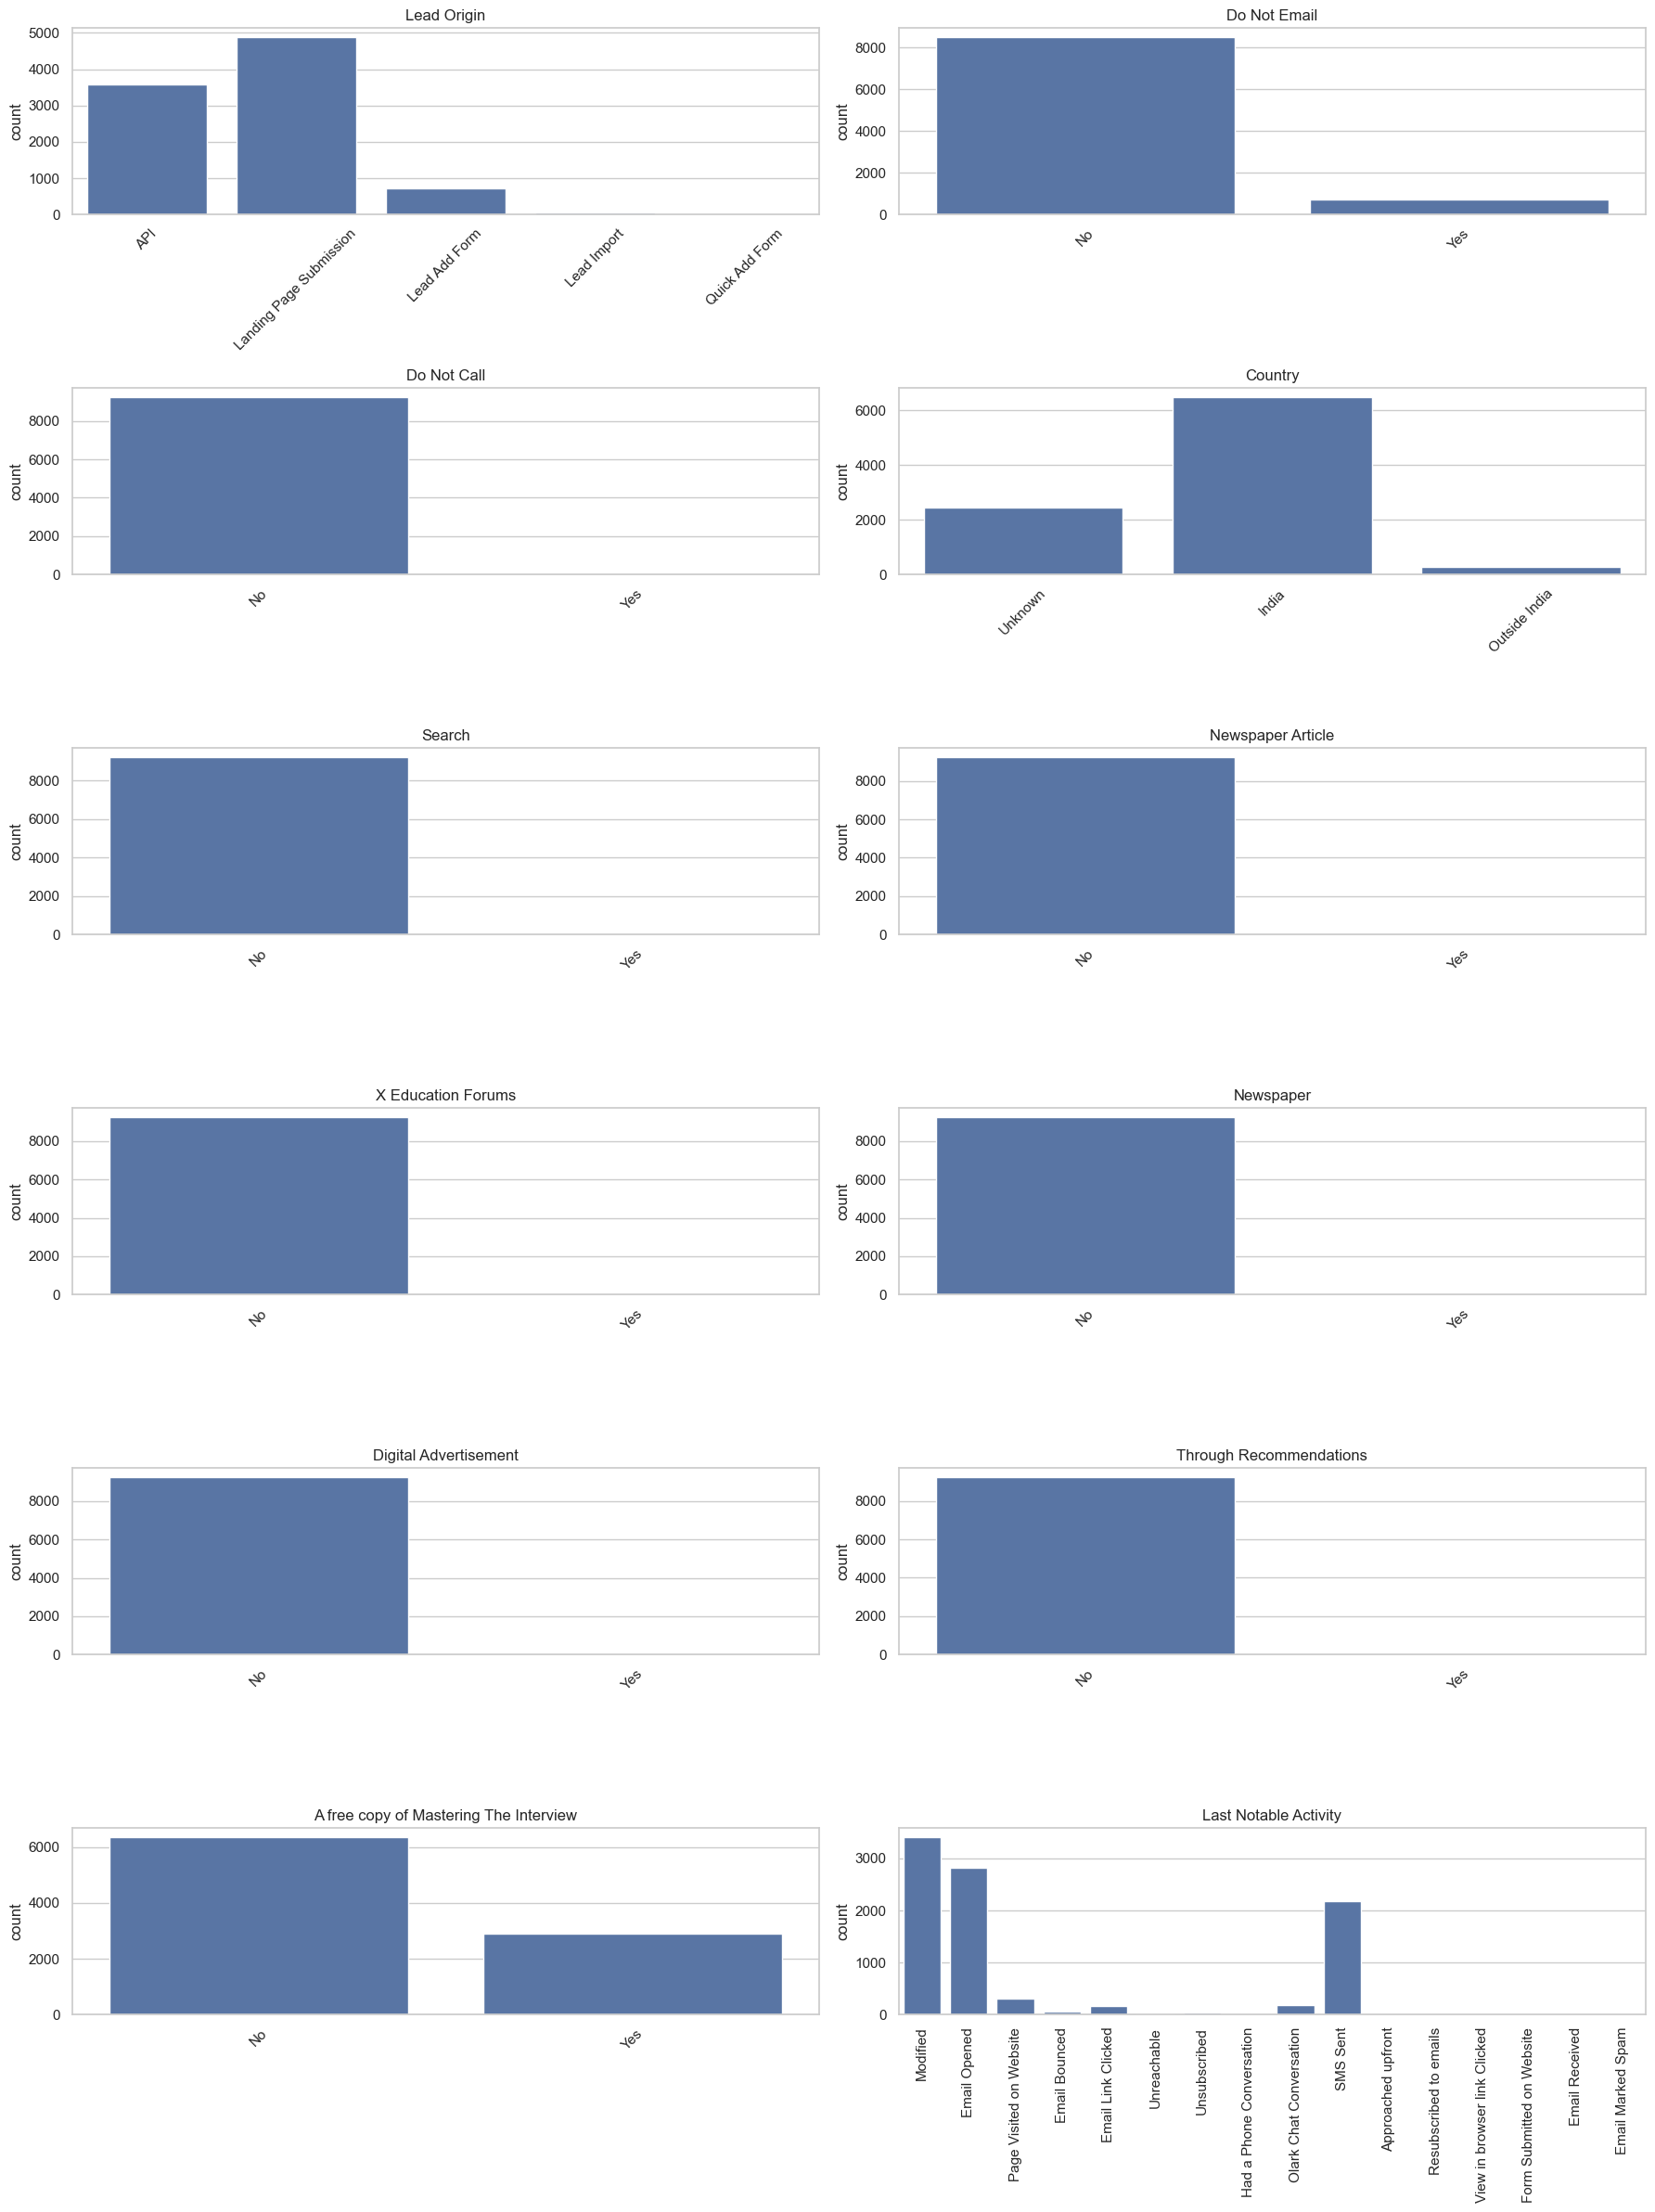

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

columns_to_plot = [
    'Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search',
    'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations',
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

plt.figure(figsize=(18, 24))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(6, 2, i)
    sns.countplot(data=df2, x=column).set(xlabel=None)
    plt.title(column)
    plt.xticks(rotation=90 if column == 'Last Notable Activity' else 45)

plt.tight_layout()
plt.show()

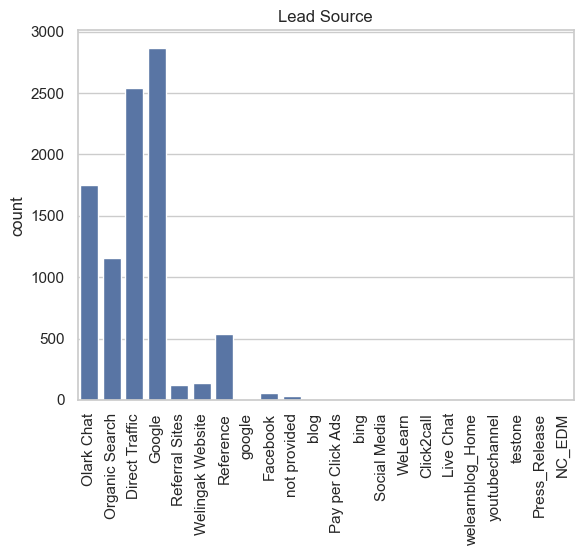

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.countplot(data=df2, x='Lead Source').set(xlabel=None)
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()

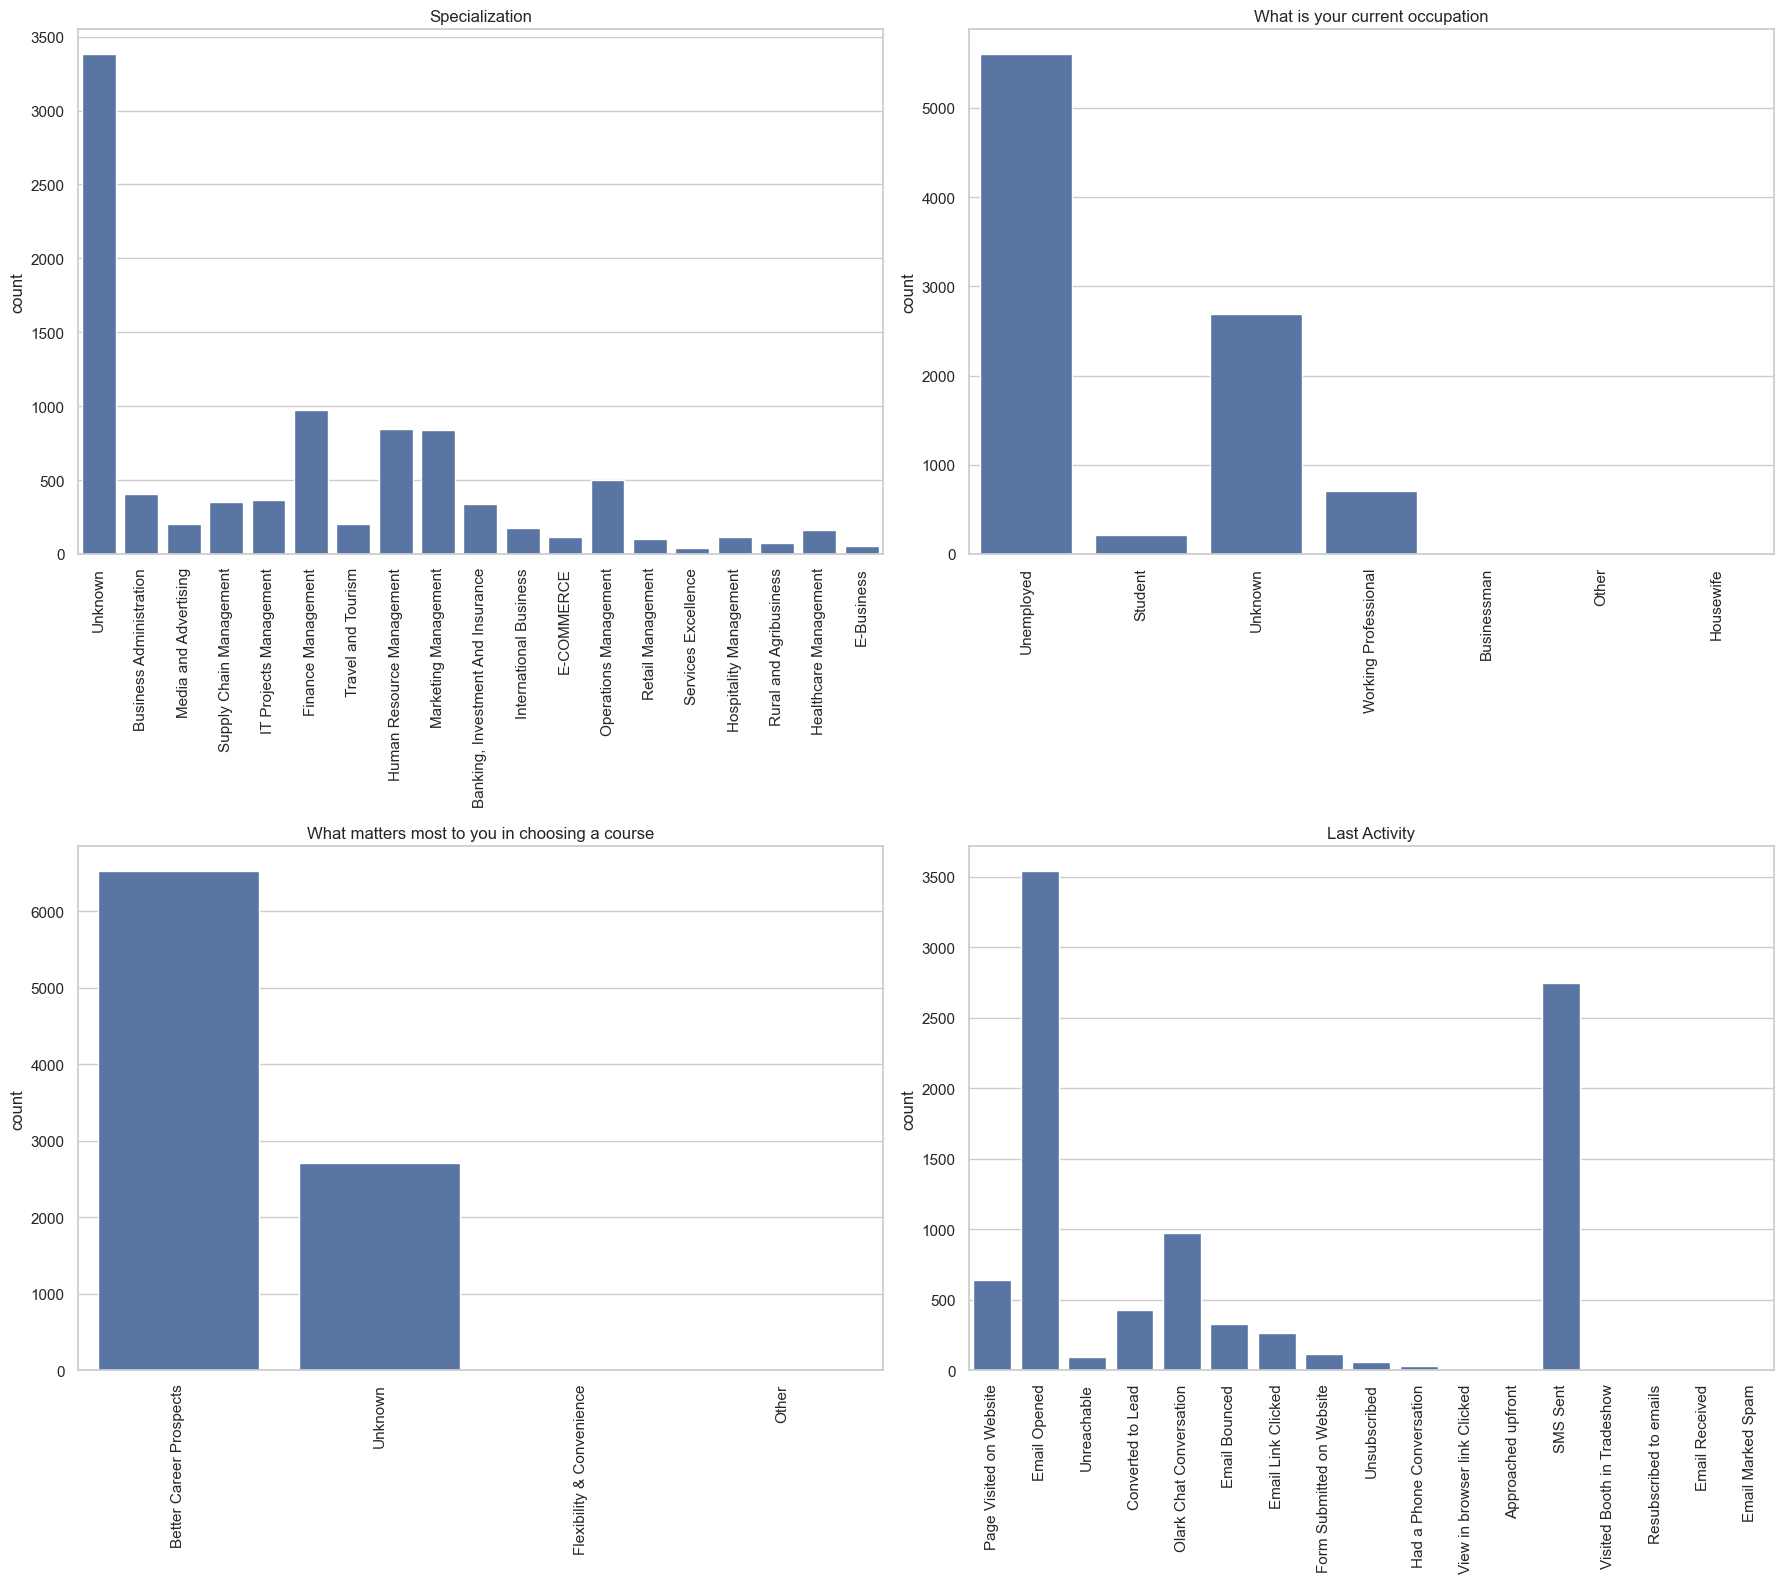

In [44]:
sns.set_theme(style="whitegrid")

columns_to_plot = [
    'Specialization',
    'What is your current occupation',
    'What matters most to you in choosing a course',
    'Last Activity'
]

plt.figure(figsize=(18, 16))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df2, x=column).set(xlabel=None)
    plt.title(column)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

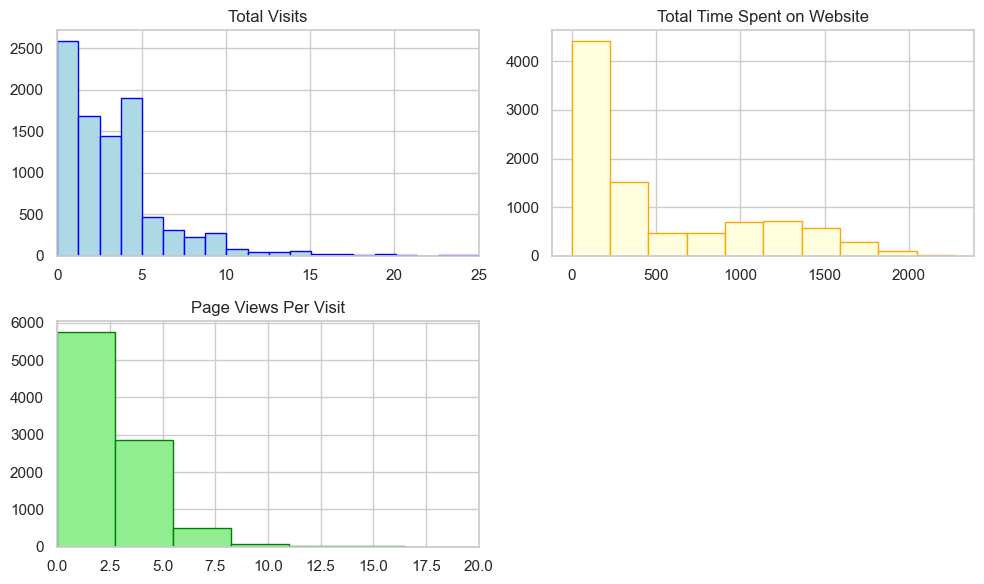

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.hist(df2['TotalVisits'], bins=200, color='lightblue', edgecolor='blue')
plt.title('Total Visits')
plt.xlim(0, 25)
plt.subplot(222)
plt.hist(df2['Total Time Spent on Website'], bins=10, color='lightyellow', edgecolor='orange')
plt.title('Total Time Spent on Website')
plt.subplot(223)
plt.hist(df2['Page Views Per Visit'], bins=20, color='lightgreen', edgecolor='green')
plt.title('Page Views Per Visit')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

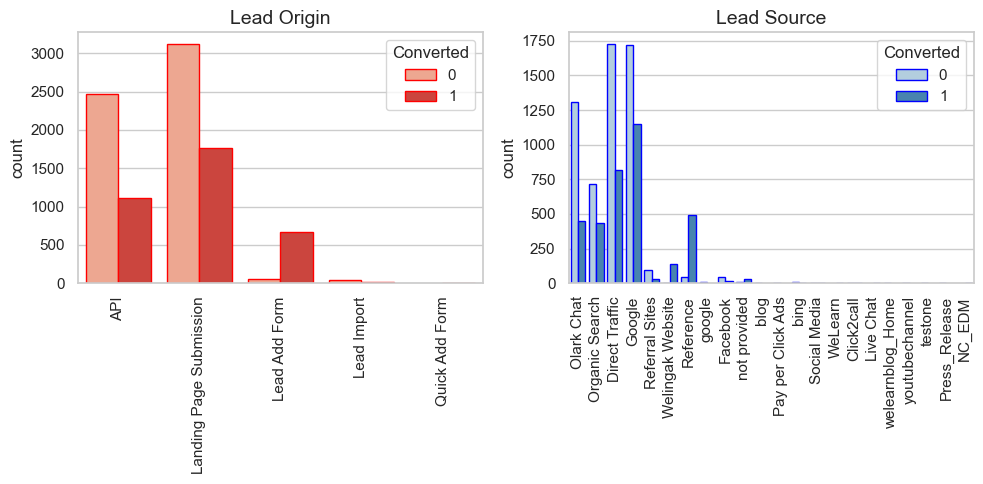

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(
    x='Lead Origin', hue='Converted', data=df2, 
    palette='Reds', edgecolor='red'
).set(xlabel=None)  
plt.title('Lead Origin', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='Lead Source', hue='Converted', data=df2, 
    palette='Blues', edgecolor='blue'
).set(xlabel=None)  
plt.title('Lead Source', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

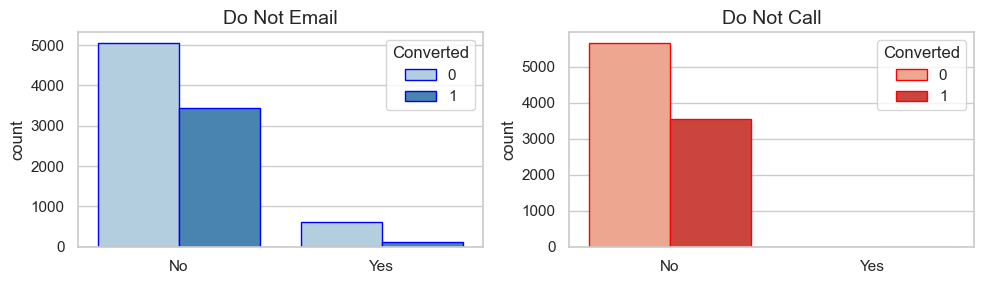

In [48]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.countplot(
    x='Do Not Email', hue='Converted', data=df2,
    palette='Blues', edgecolor='blue'
).set(xlabel=None) 
plt.title('Do Not Email', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(
    x='Do Not Call', hue='Converted', data=df2,
    palette='Reds', edgecolor='red'
).set(xlabel=None)  
plt.title('Do Not Call', fontsize=14)

plt.tight_layout()
plt.show()


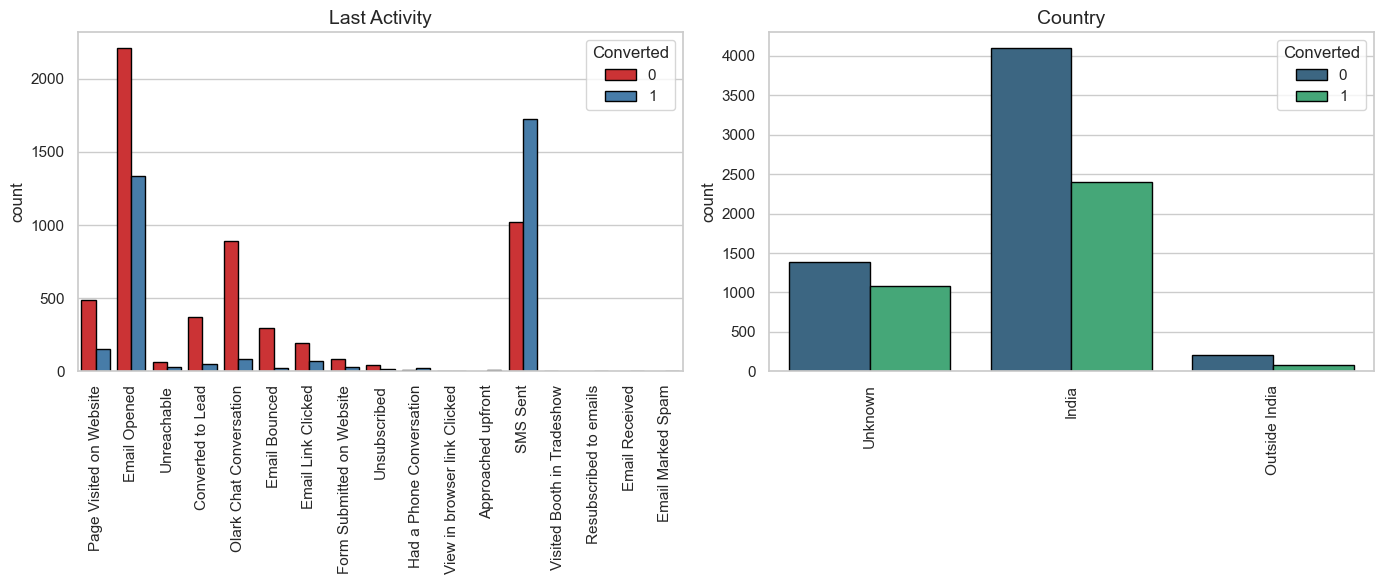

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(
    x='Last Activity', hue='Converted', data=df2,
    palette='Set1', edgecolor='black'
).set(xlabel=None)  
plt.title('Last Activity', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='Country', hue='Converted', data=df2,
    palette='viridis', edgecolor='black'
).set(xlabel=None) 
plt.title('Country', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

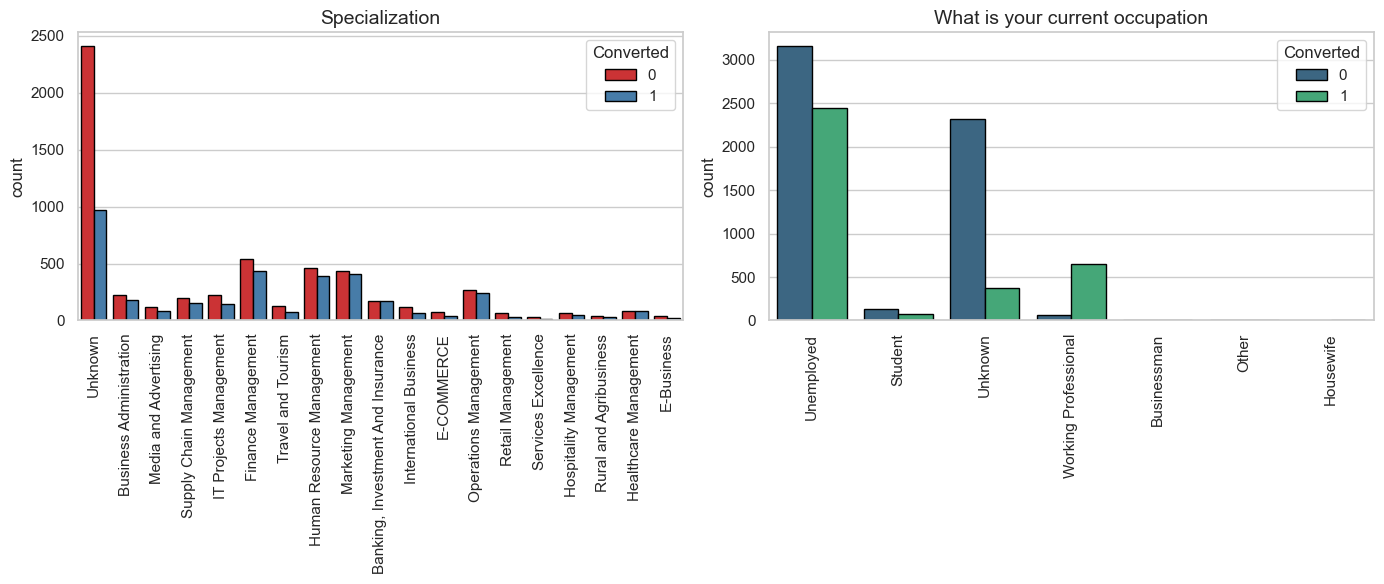

In [50]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(
    x='Specialization', hue='Converted', data=df2,
    palette='Set1', edgecolor='black'
).set(xlabel=None) 
plt.title('Specialization', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='What is your current occupation', hue='Converted', data=df2,
    palette='viridis', edgecolor='black'
).set(xlabel=None) 
plt.title('What is your current occupation', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

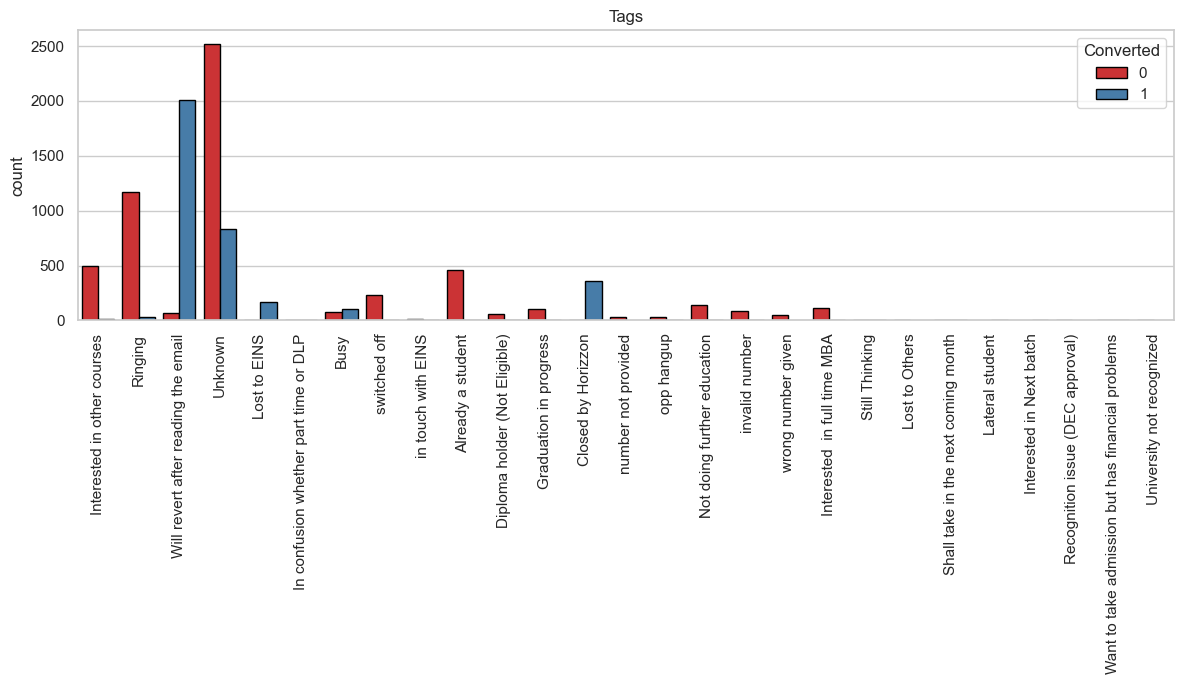

In [51]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
sns.countplot(
    x='Tags', hue='Converted', data=df2,
    palette='Set1', edgecolor='black'
).set(xlabel=None)
plt.title('Tags')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

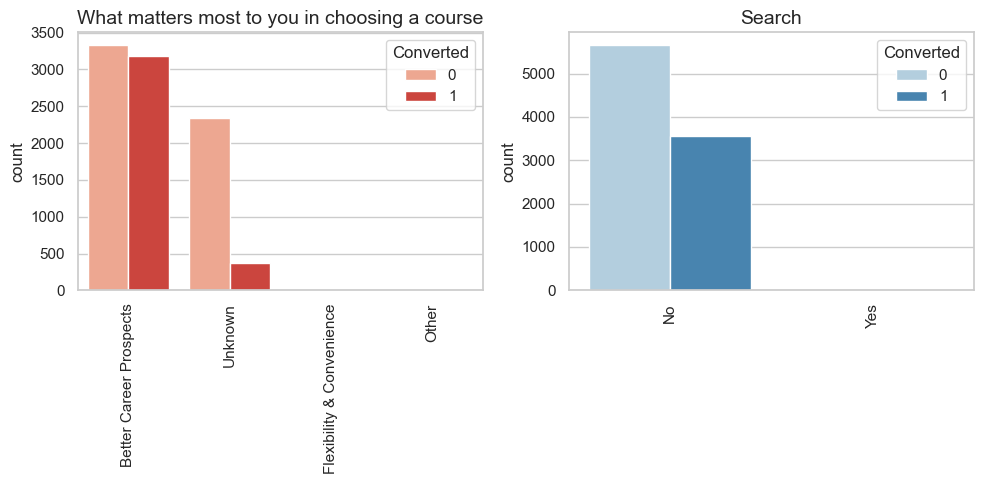

In [52]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(
    x='What matters most to you in choosing a course', 
    hue='Converted', data=df2, 
    palette='Reds'
).set(xlabel=None)  
plt.title('What matters most to you in choosing a course', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='Search', hue='Converted', data=df2, 
    palette='Blues'
).set(xlabel=None)  
plt.title('Search', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

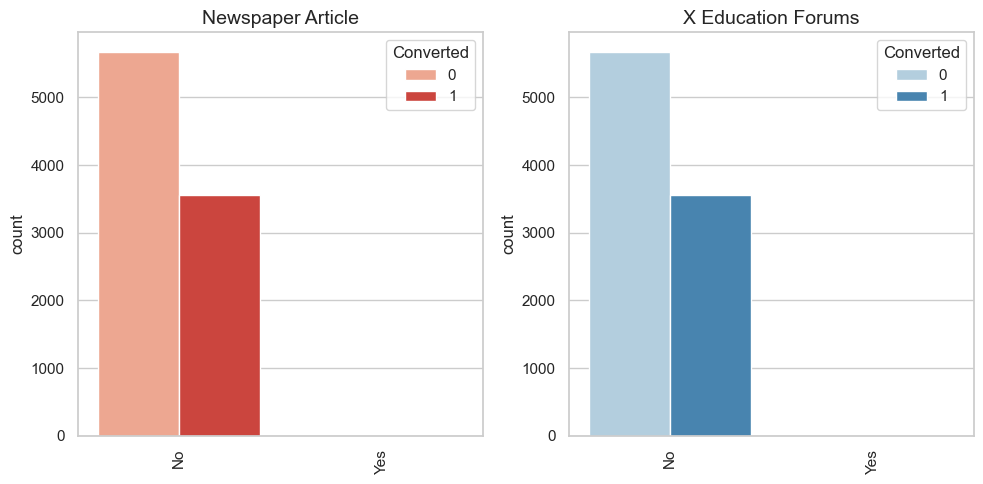

In [53]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(
    x='Newspaper Article', hue='Converted', data=df2, 
    palette='Reds'
).set(xlabel=None) 
plt.title('Newspaper Article', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='X Education Forums', hue='Converted', data=df2, 
    palette='Blues'
).set(xlabel=None)  
plt.title('X Education Forums', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

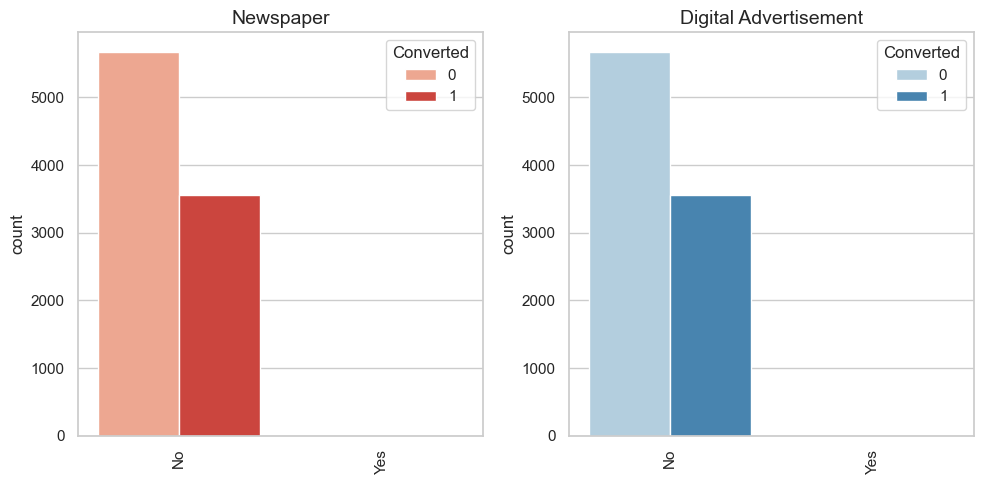

In [54]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(
    x='Newspaper', hue='Converted', data=df2, 
    palette='Reds'
).set(xlabel=None)  
plt.title('Newspaper', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='Digital Advertisement', hue='Converted', data=df2, 
    palette='Blues'
).set(xlabel=None) 
plt.title('Digital Advertisement', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

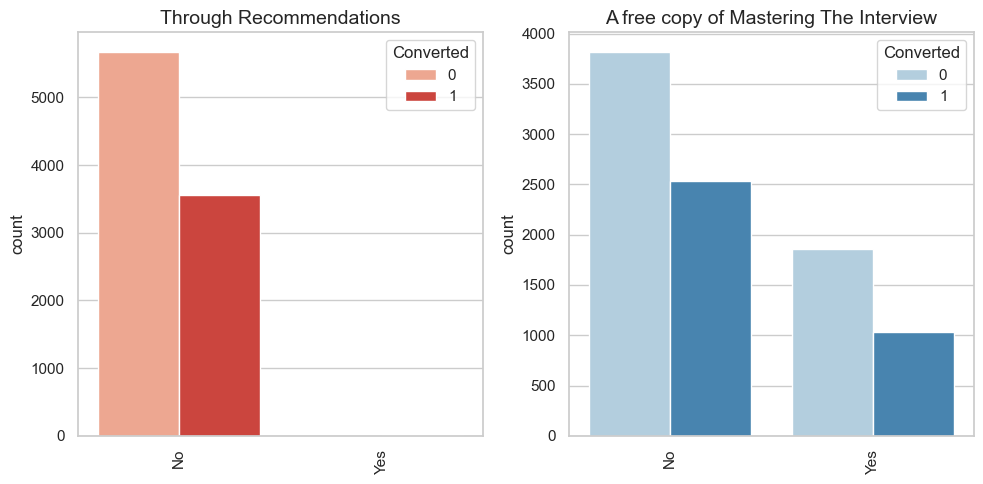

In [55]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(
    x='Through Recommendations', hue='Converted', data=df2, 
    palette='Reds'
).set(xlabel=None) 
plt.title('Through Recommendations', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    x='A free copy of Mastering The Interview', hue='Converted', data=df2, 
    palette='Blues'
).set(xlabel=None)  
plt.title('A free copy of Mastering The Interview', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

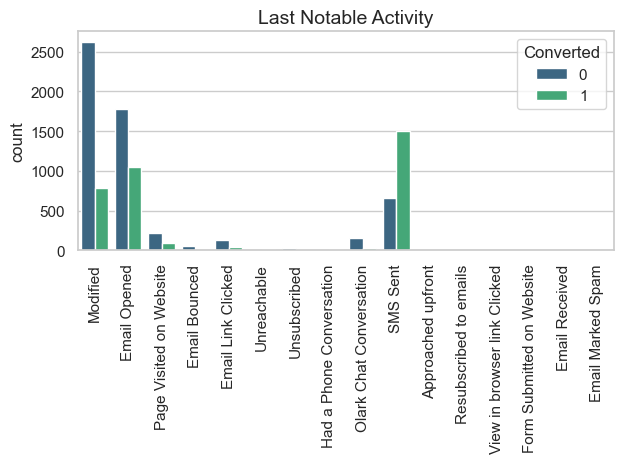

In [56]:
sns.countplot(
    x='Last Notable Activity', hue='Converted', data=df2, 
    palette='viridis'
).set(xlabel=None) 
plt.title('Last Notable Activity', fontsize=14)
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [58]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [59]:
numeric = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


In [60]:
# Encoding categorical variables:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns:
categorical_columns = df2.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [61]:
# One-hot encode nominal variables:
# Create dummy variables using the 'get_dummies':
dummy = pd.get_dummies(df2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']],dtype=int, drop_first=True)
# Add the results to the master dataframe:
df_final_dum = pd.concat([df2, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unknown,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Outside India,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# df2['Specialization'].value_counts(dropna=False):

In [63]:
df_final_dum.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=104)

In [64]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select'
# which is useless so we drop that level by specifying it explicitly
# dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization',dtype=int)
# dummy_spl = dummy_spl.drop(['Specialization_Unknown'], axis=1)
# leads = pd.concat([DF2, dummy_spl], axis = 1)

In [65]:
# DF2.columns:

In [66]:
# Dropping the variables for which the dummy variables have been created:
leads = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [67]:
leads = leads.drop(['Tags'],axis=1)

In [68]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
leads.shape

(9240, 86)

In [70]:
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = leads.drop('Converted', axis=1)
y = leads['Converted']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [72]:
#lets check the shape:
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6468, 85)
y_train Size (6468,)


In [73]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

**Scaling:**
*Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.*

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Correlation Matrix:

<Axes: >

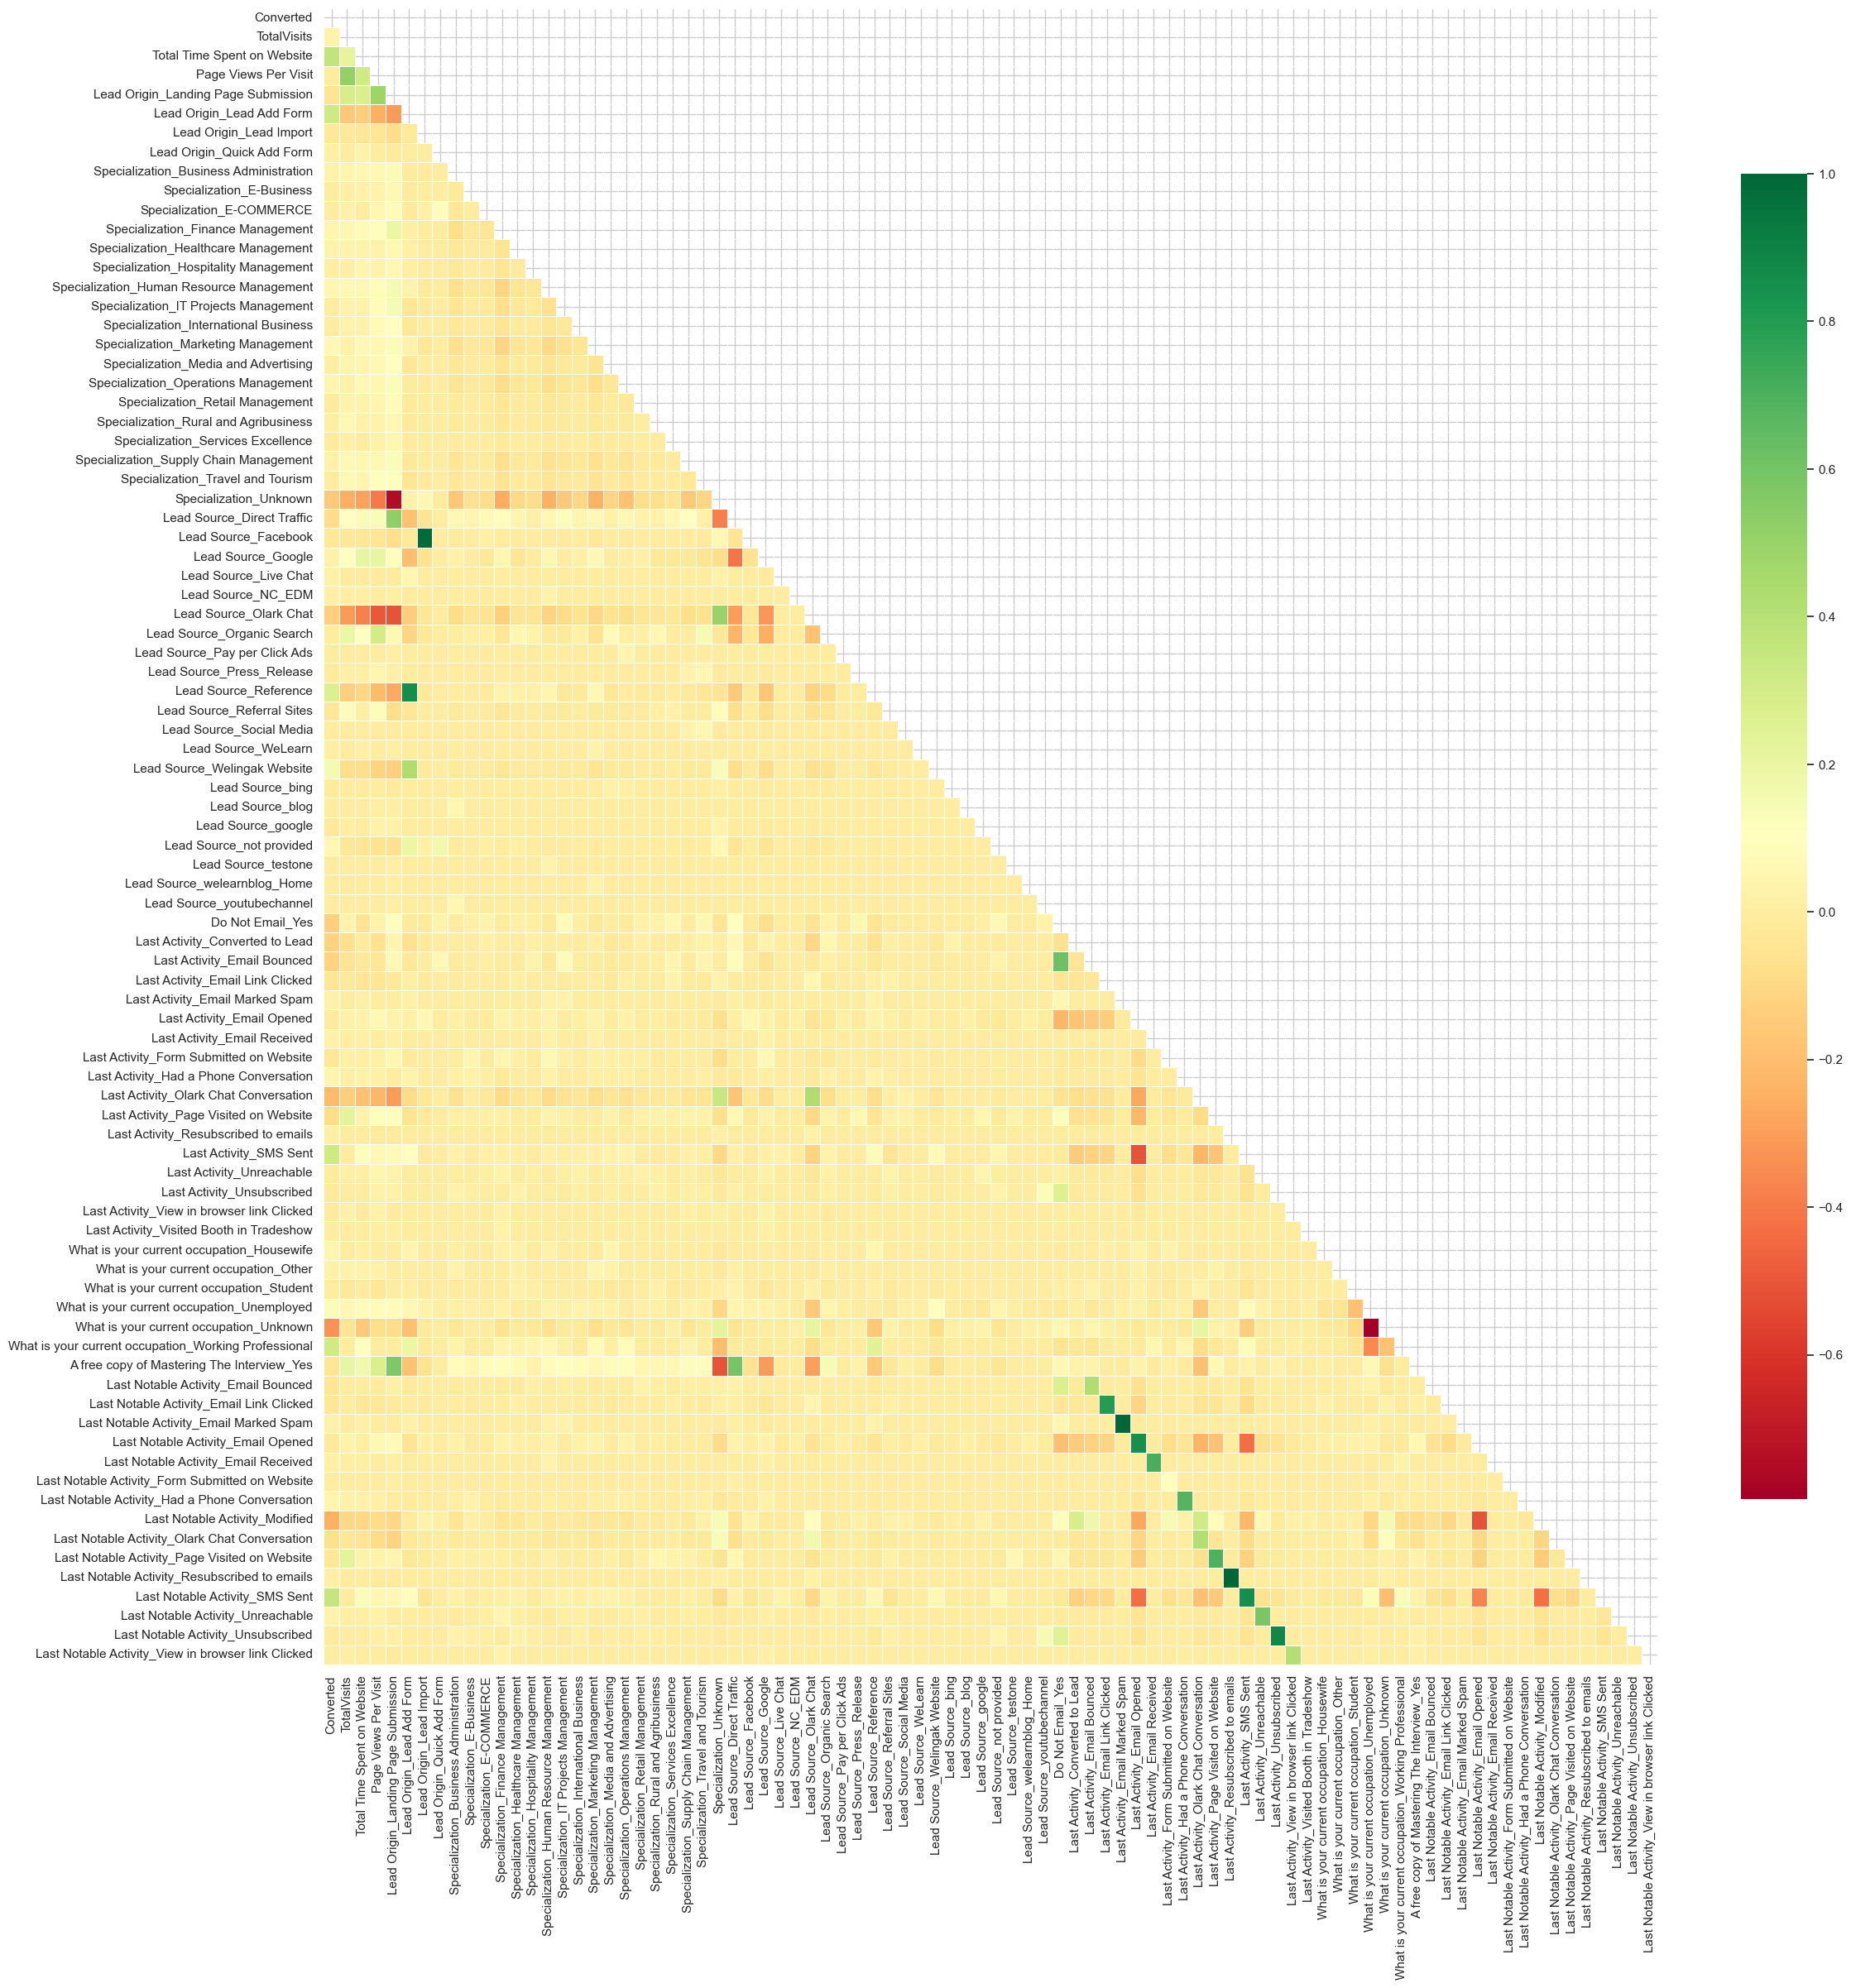

In [78]:
correlation_matrix = leads.select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(26, 26))
sns.heatmap(correlation_matrix, mask=mask, cmap="RdYlGn", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

In [79]:
# Import 'LogisticRegression':
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
# Import RFE:
from sklearn.feature_selection import RFE

In [81]:
# Running RFE with 15 variables as output:
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on the training data:
rfe = rfe.fit(X_train, y_train)

# Let's take a look at which features have been selected by RFE:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 69),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 36),
 ('Specialization_E-COMMERCE', False, 65),
 ('Specialization_Finance Management', False, 67),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 27),
 ('Specialization_Human Resource Management', False, 62),
 ('Specialization_IT Projects Management', False, 60),
 ('Specialization_International Business', False, 35),
 ('Specialization_Marketing Management', False, 63),
 ('Specialization_Media and Advertising', False, 34),
 ('Specialization_Operations Management', False, 66),
 ('Specialization_Retail Management', False, 21),
 ('Specialization_Rural and Agribus

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 69),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 36),
 ('Specialization_E-COMMERCE', False, 65),
 ('Specialization_Finance Management', False, 67),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 27),
 ('Specialization_Human Resource Management', False, 62),
 ('Specialization_IT Projects Management', False, 60),
 ('Specialization_International Business', False, 35),
 ('Specialization_Marketing Management', False, 63),
 ('Specialization_Media and Advertising', False, 34),
 ('Specialization_Operations Management', False, 66),
 ('Specialization_Retail Management', False, 21),
 ('Specialization_Rural and Agribus

In [83]:
# Put all the columns selected by RFE in the variable 'col':
col = X_train.columns[rfe.support_]

In [84]:
# Selecting columns selected by RFE:
X_train = X_train[col]

In [85]:
# Importing statsmodels:
import statsmodels.api as sm

In [86]:
print(X_train.dtypes)

TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_Landing Page Submission                       int32
Lead Origin_Lead Add Form                                 int32
Specialization_Unknown                                    int32
Lead Source_Olark Chat                                    int32
Lead Source_Welingak Website                              int32
Do Not Email_Yes                                          int32
Last Activity_Olark Chat Conversation                     int32
Last Activity_SMS Sent                                    int32
What is your current occupation_Housewife                 int32
What is your current occupation_Unknown                   int32
What is your current occupation_Working Professional      int32
Last Notable Activity_Had a Phone Conversation            int32
Last Notable Activity_Unreachable                         int32
dtype: object


In [87]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.0
Date:                Mon, 20 Jan 2025   Deviance:                       5224.0
Time:                        22:24:54   Pearson chi2:                 6.90e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4282      0.138    -10.360      0.000      -1.698      -1.158
TotalVisits                                              6.0471      2.064      2.930      0.003       2.002      10.093
Total Time Spent on Website                              4.4851      0.166     27.019      0.000       4.160       4.810
Lead Origin_Landing Page Submission                     -0.9134      0.126     -7.236      0.000      -1.161      -0.666
Lead Origin_Lead Add Form                                3.1253      0.212     14.718      0.000       2.709       3.541
Specialization_Unknown                                  -0.7951      0.123     -6.489      0.000      -1.035      -0.555
Lead Source_Olark Chat                                   1.2592      0.126     10.004      0.000       1.013       1.506
Lead Source_Welingak Website                             2.8292      1.031      2.745      0.006       0.809       4.849
Do Not Email_Yes                                        -1.4557      0.167     -8.735      0.000      -1.782      -1.129
Last Activity_Olark Chat Conversation                   -1.1776      0.163     -7.227      0.000      -1.497      -0.858
Last Activity_SMS Sent                                   1.4023      0.075     18.676      0.000       1.255       1.549
What is your current occupation_Housewife               22.1891   1.83e+04      0.001      0.999   -3.59e+04    3.59e+04
What is your current occupation_Unknown                 -1.2259      0.089    -13.822      0.000      -1.400      -1.052
What is your current occupation_Working Professional     2.3947      0.186     12.891      0.000       2.031       2.759
Last Notable Activity_Had a Phone Conversation           3.3067      1.170      2.827      0.005       1.014       5.599
Last Notable Activity_Unreachable                        2.5268      0.705      3.583      0.000       1.145       3.909
========================================================================================================================
"""

In [88]:
# Importing 'variance_inflation_factor':
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Make a VIF dataframe for all the variables present:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_Unknown,2.48
2,Lead Origin_Landing Page Submission,2.47
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
11,What is your current occupation_Unknown,1.62
0,TotalVisits,1.61
9,Last Activity_SMS Sent,1.52
8,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.27


In [90]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [91]:
# Refit the model with the new set of features:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.7
Date:                Mon, 20 Jan 2025   Deviance:                       5229.4
Time:                        22:24:58   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4241      0.138    -10.334      0.000      -1.694      -1.154
TotalVisits                                              6.0012      2.061      2.912      0.004       1.962      10.041
Total Time Spent on Website                              4.4853      0.166     27.023      0.000       4.160       4.811
Lead Origin_Landing Page Submission                     -0.9118      0.126     -7.225      0.000      -1.159      -0.664
Lead Origin_Lead Add Form                                3.1355      0.212     14.778      0.000       2.720       3.551
Specialization_Unknown                                  -0.7974      0.123     -6.509      0.000      -1.037      -0.557
Lead Source_Olark Chat                                   1.2590      0.126     10.003      0.000       1.012       1.506
Lead Source_Welingak Website                             2.8189      1.031      2.735      0.006       0.799       4.839
Do Not Email_Yes                                        -1.4584      0.167     -8.750      0.000      -1.785      -1.132
Last Activity_Olark Chat Conversation                   -1.1792      0.163     -7.237      0.000      -1.499      -0.860
Last Activity_SMS Sent                                   1.3988      0.075     18.638      0.000       1.252       1.546
What is your current occupation_Unknown                 -1.2275      0.089    -13.842      0.000      -1.401      -1.054
What is your current occupation_Working Professional     2.3909      0.186     12.871      0.000       2.027       2.755
Last Notable Activity_Had a Phone Conversation           3.3025      1.170      2.824      0.005       1.010       5.595
Last Notable Activity_Unreachable                        2.5232      0.705      3.577      0.000       1.141       3.906
========================================================================================================================
"""

In [92]:
# Make a VIF dataframe for all the variables present:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_Unknown,2.48
2,Lead Origin_Landing Page Submission,2.47
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
10,What is your current occupation_Unknown,1.62
0,TotalVisits,1.61
9,Last Activity_SMS Sent,1.52
8,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.27


In [93]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [94]:
# Refit the model with the new set of features:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.5
Date:                Mon, 20 Jan 2025   Deviance:                       5247.0
Time:                        22:25:01   Pearson chi2:                 7.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4085
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4669      0.138    -10.650      0.000      -1.737      -1.197
TotalVisits                                              6.0247      2.062      2.922      0.003       1.983      10.066
Total Time Spent on Website                              4.4869      0.166     27.025      0.000       4.161       4.812
Lead Origin_Landing Page Submission                     -0.8704      0.126     -6.920      0.000      -1.117      -0.624
Lead Origin_Lead Add Form                                3.4825      0.205     16.991      0.000       3.081       3.884
Specialization_Unknown                                  -0.7404      0.122     -6.067      0.000      -0.980      -0.501
Lead Source_Olark Chat                                   1.2557      0.126      9.992      0.000       1.009       1.502
Do Not Email_Yes                                        -1.4637      0.166     -8.800      0.000      -1.790      -1.138
Last Activity_Olark Chat Conversation                   -1.1803      0.163     -7.252      0.000      -1.499      -0.861
Last Activity_SMS Sent                                   1.4011      0.075     18.702      0.000       1.254       1.548
What is your current occupation_Unknown                 -1.2330      0.089    -13.904      0.000      -1.407      -1.059
What is your current occupation_Working Professional     2.3877      0.186     12.844      0.000       2.023       2.752
Last Notable Activity_Had a Phone Conversation           3.3054      1.170      2.825      0.005       1.012       5.598
Last Notable Activity_Unreachable                        2.5270      0.706      3.580      0.000       1.144       3.910
========================================================================================================================
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.46
4,Specialization_Unknown,2.43
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
9,What is your current occupation_Unknown,1.61
0,TotalVisits,1.60
8,Last Activity_SMS Sent,1.52
7,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.22
10,What is your current occupation_Working Profes...,1.20


In [96]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [97]:
# Refit the model with the new set of features:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.5
Date:                Mon, 20 Jan 2025   Deviance:                       5258.9
Time:                        22:25:05   Pearson chi2:                 7.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4608      0.138    -10.617      0.000      -1.731      -1.191
TotalVisits                                              6.1518      2.068      2.974      0.003       2.098      10.206
Total Time Spent on Website                              4.4795      0.166     27.025      0.000       4.155       4.804
Lead Origin_Landing Page Submission                     -0.8644      0.126     -6.883      0.000      -1.110      -0.618
Lead Origin_Lead Add Form                                3.4814      0.205     16.989      0.000       3.080       3.883
Specialization_Unknown                                  -0.7421      0.122     -6.088      0.000      -0.981      -0.503
Lead Source_Olark Chat                                   1.2547      0.126      9.989      0.000       1.008       1.501
Do Not Email_Yes                                        -1.4683      0.166     -8.836      0.000      -1.794      -1.143
Last Activity_Olark Chat Conversation                   -1.1843      0.163     -7.279      0.000      -1.503      -0.865
Last Activity_SMS Sent                                   1.3927      0.075     18.617      0.000       1.246       1.539
What is your current occupation_Unknown                 -1.2337      0.089    -13.924      0.000      -1.407      -1.060
What is your current occupation_Working Professional     2.3801      0.186     12.811      0.000       2.016       2.744
Last Notable Activity_Unreachable                        2.5169      0.706      3.567      0.000       1.134       3.900
========================================================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.46
4,Specialization_Unknown,2.43
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
9,What is your current occupation_Unknown,1.61
0,TotalVisits,1.60
8,Last Activity_SMS Sent,1.52
7,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.22
10,What is your current occupation_Working Profes...,1.20


*All value of p are below 0.05.*
*We can fix the model*

In [99]:
# Predicting the probabilities on the train set:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.188923
8413    0.903262
2961    0.989803
24      0.720482
2740    0.435987
489     0.105970
9116    0.609304
4176    0.221396
8537    0.640647
6267    0.126869
dtype: float64

In [100]:
# Reshaping to an array:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18892263, 0.90326158, 0.98980264, 0.72048221, 0.43598723,
       0.10596979, 0.60930397, 0.22139572, 0.64064697, 0.12686928])

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.188923
1,1,0.903262
2,1,0.989803
3,1,0.720482
4,0,0.435987


In [102]:
# Substituting 0 or 1 with the cut off as 0.5:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.188923,0
1,1,0.903262,1
2,1,0.989803,1
3,1,0.720482,1
4,0,0.435987,0


In [103]:
# Importing metrics from sklearn for evaluation:
from sklearn import metrics

In [104]:
# Creating confusion matrix:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3488,  466],
       [ 735, 1779]], dtype=int64)

In [105]:
# Predicted      not_churn   churn
# Actual
# not_churn        3488       466
# churn             735      1779

In [106]:
# Check the overall accuracy:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8143166357452072

In [107]:
# Substituting the value of true positive:
TP = confusion[1,1]
# Substituting the value of true negatives:
TN = confusion[0,0]
# Substituting the value of false positives:
FP = confusion[0,1] 
# Substituting the value of false negatives:
FN = confusion[1,0]

In [108]:
# Calculating the sensitivity:
TP/(TP+FN)

0.7076372315035799

In [109]:
# Calculating the specificity:
TN/(TN+FP)

0.8821446636317652

In [110]:
# ROC function:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

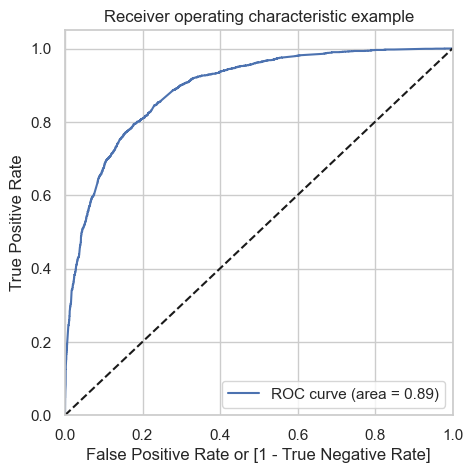

In [112]:
# Call the ROC function:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [113]:
# Creating columns with different probability cutoffs:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188923,0,1,1,0,0,0,0,0,0,0,0
1,1,0.903262,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989803,1,1,1,1,1,1,1,1,1,1,1
3,1,0.720482,1,1,1,1,1,1,1,1,1,0,0
4,0,0.435987,0,1,1,1,1,1,0,0,0,0,0


In [114]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity:
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.585962,0.986476,0.331310
0.2,0.2,0.765152,0.919650,0.666920
0.3,0.3,0.795764,0.848846,0.762013
0.4,0.4,0.811843,0.780827,0.831563
0.5,0.5,0.814317,0.707637,0.882145
0.6,0.6,0.808287,0.640414,0.915023
0.7,0.7,0.786333,0.535800,0.945625
0.8,0.8,0.756030,0.422832,0.967881
0.9,0.9,0.713049,0.280827,0.987860


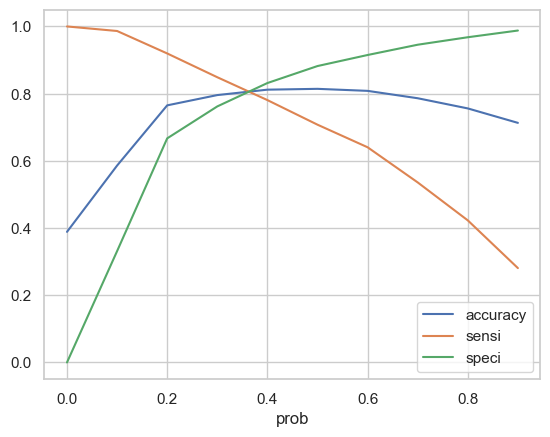

In [115]:
# Plotting:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188923,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.903262,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989803,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.720482,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.435987,0,1,1,1,1,1,0,0,0,0,0,1


In [117]:
# Check the overall accuracy:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8042671614100185

In [118]:
# Creating confusion matrix:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3171,  783],
       [ 483, 2031]], dtype=int64)

In [119]:
# Substituting the value of true positive:
TP = confusion2[1,1]
# Substituting the value of true negatives:
TN = confusion2[0,0]
# Substituting the value of false positives:
FP = confusion2[0,1] 
# Substituting the value of false negatives:
FN = confusion2[1,0]

In [120]:
# Calculating the sensitivity:
TP/(TP+FN)

0.8078758949880668

In [121]:
# Calculating the specificity:
TN/(TN+FP)

0.8019726858877086

**Prediction on Test set:**

In [122]:
# Scaling numeric values:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [123]:
# Substituting all the columns in the final train model:
col = X_train.columns

In [124]:
# Select the columns in X_train for X_test as well:
X_test = X_test[col]
# Add a constant to X_test:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Unknown,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
567,1.0,0.015936,0.147359,1,0,0,0,0,0,0,0,0,0
2303,1.0,0.007968,0.688859,1,0,0,0,0,0,0,0,0,0
1523,1.0,0.011952,0.596538,0,0,0,0,0,0,0,0,0,0
6923,1.0,0.019920,0.083000,1,0,0,0,0,0,0,0,0,0
7841,1.0,0.007968,0.311585,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,0.007968,0.118065,0,0,1,0,0,0,1,1,0,0
1049,1.0,0.031873,0.703506,0,0,1,0,0,0,0,0,0,0
7778,1.0,0.007968,0.135375,1,0,0,0,0,0,0,0,0,0
6432,1.0,0.000000,0.000000,0,0,1,1,0,0,1,0,0,0


In [125]:
# Storing prediction of test set in the variable 'y_test_pred':
y_test_pred = res.predict(X_test_sm)
# Coverting it to df:
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.172635
1,0,0.692019
2,0,0.783282
3,0,0.138137
4,0,0.293088


In [126]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.375 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.172635,0
1,0,0.692019,1
2,0,0.783282,1
3,0,0.138137,0
4,0,0.293088,0
...,...,...,...
2767,0,0.187533,0
2768,0,0.758508,1
2769,0,0.158455,0
2770,0,0.609304,1


In [127]:
# Check the overall accuracy:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8134920634920635

In [128]:
# Creating confusion matrix:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1418,  307],
       [ 210,  837]], dtype=int64)

In [129]:
# Substituting the value of true positive:
TP = confusion2[1,1]
# Substituting the value of true negatives:
TN = confusion2[0,0]
# Substituting the value of false positives:
FP = confusion2[0,1] 
# Substituting the value of false negatives:
FN = confusion2[1,0]

In [130]:
# Calculating the sensitivity:
TP/(TP+FN)

0.7994269340974212

In [131]:
# Calculating the specificity:
TN/(TN+FP)

0.8220289855072463

**Precision-Recall**

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3488,  466],
       [ 735, 1779]], dtype=int64)

In [133]:
# Precision = TP / TP + FP:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7924276169265033

In [134]:
#Recall = TP / TP + FN:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7076372315035799

*With the current cut off as 0.35 we have Precision around 80% and Recall around 70%.*

**Precision and recall tradeoff**

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

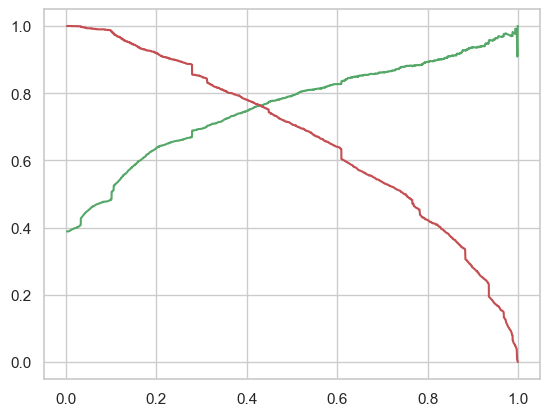

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188923,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.903262,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989803,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.720482,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.435987,0,1,1,1,1,1,0,0,0,0,0,1


In [140]:
# Accuracy:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136982065553494

In [141]:
# Creating confusion matrix again:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3314,  640],
       [ 565, 1949]], dtype=int64)

In [142]:
# Substituting the value of true positive:
TP = confusion2[1,1]
# Substituting the value of true negatives:
TN = confusion2[0,0]
# Substituting the value of false positives:
FP = confusion2[0,1] 
# Substituting the value of false negatives:
FN = confusion2[1,0]

In [143]:
# Precision = TP / TP + FP:
TP / (TP + FP)

0.7528003089996137

In [144]:
#Recall = TP / TP + FN:
TP / (TP + FN)

0.7752585521081942

*With the current cut off as 0.41 we have Precision around 75% and Recall around 78%.*

**Prediction on Test set**

In [145]:
# Storing prediction of test set in the variable 'y_test_pred':
y_test_pred = res.predict(X_test_sm)
# Coverting it to df:
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.172635
1,0,0.692019
2,0,0.783282
3,0,0.138137
4,0,0.293088


In [146]:
# Making prediction using cut off 0.41:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.172635,0
1,0,0.692019,1
2,0,0.783282,1
3,0,0.138137,0
4,0,0.293088,0
...,...,...,...
2767,0,0.187533,0
2768,0,0.758508,1
2769,0,0.158455,0
2770,0,0.609304,1


In [147]:
# Check the overall accuracy:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8138528138528138

In [148]:
# Creating confusion matrix:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1445,  280],
       [ 236,  811]], dtype=int64)

In [149]:
# Substituting the value of true positive:
TP = confusion2[1,1]
# Substituting the value of true negatives:
TN = confusion2[0,0]
# Substituting the value of false positives:
FP = confusion2[0,1] 
# Substituting the value of false negatives:
FN = confusion2[1,0]

In [150]:
# Precision = TP / TP + FP:
TP / (TP + FP)

0.7433547204399633

In [151]:
#Recall = TP / TP + FN:
TP / (TP + FN)

0.7745940783190067